In [ ]:
import librosa
import librosa.display 

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 7.0 MB/s 
     |████████████████████████████████| 381 kB 48.3 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.30 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import IPython.display as ipd
from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD, Adam
from livelossplot import PlotLossesKeras

import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
s = '/content/drive/MyDrive/Colab Notebooks/Datasets/AUDIO/Tess/OAF_angry/OAF_back_angry.wav'

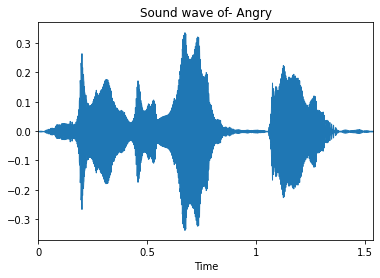

In [ ]:
# Plot the raw display

data, sampling_rate = librosa.load(s, sr=44100)
emotion = 'Angry'

plt.title(f'Sound wave of- {emotion}')
librosa.display.waveplot(data, sampling_rate)
plt.show()

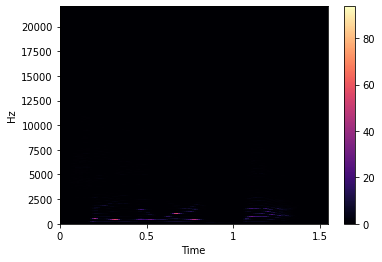

In [ ]:
# Display in a time-frequency domain
# Human can only hear sounds which are concentrated in a very small frequency and amplitude ranges (unlike dogs, for example)

D = np.abs(librosa.stft(data))
librosa.display.specshow(D, sr=sampling_rate, x_axis='time', y_axis='linear');
plt.colorbar()
plt.show()

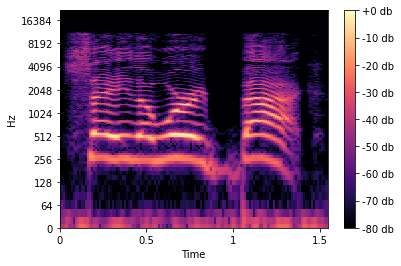

In [ ]:
# To fix above display, we applied log-scale on both the frequency and the amplitudes. 
# Note that after applying log-scale on our data, we’re no longer measuring our signal in units of amplitudes, 
# but rather in units of decibels.
# Spectrogram
# displays the frequencies and decibels over time

DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sampling_rate, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f db')
plt.show()

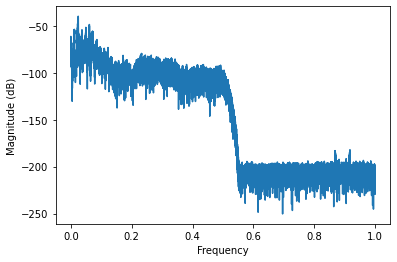

In [ ]:
# The representation of the Decibels against the Frequencies in time frame
# Log-scaled spectrum
# relation between the decibels and the frequencies

plt.magnitude_spectrum(data, scale='dB')
plt.show()

EXAMPLE

In [ ]:
TESS_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/AUDIO/Tess/'

In [ ]:
dir_list = os.listdir(TESS_path)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [ ]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS_path + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry_female')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust_female')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear_female')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy_female')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral_female')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise_female')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad_female')
        else:
            emotion.append('Unknown')
        path.append(TESS_path + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['emotion_label'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.insert(2, "actors", "female", True)
TESS_df.emotion_label.value_counts()

fear_female        400
surprise_female    400
sad_female         400
angry_female       400
disgust_female     400
happy_female       400
neutral_female     400
Name: emotion_label, dtype: int64

In [ ]:
TESS_df['emotion_label'].value_counts()

fear_female        400
surprise_female    400
sad_female         400
angry_female       400
disgust_female     400
happy_female       400
neutral_female     400
Name: emotion_label, dtype: int64

In [ ]:
emotion2_labels_dict_comb = {'angry_female':'negative_female',
                        'disgust_female':'negative_female',
                        'fear_female':'negative_female',
                        'happy_female':'positive_female',
                        'neutral_female':'neutral_female',
                        'sad_female':'negative_female',
                        'surprise_female':'positive_female',
                        'Unknown': 'unk'}

TESS_df['emotion2'] = TESS_df['emotion_label'].map(emotion2_labels_dict_comb)
TESS_df.head()

,emotion_label,source,actors,path,emotion2
0,fear_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female
1,fear_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female
2,fear_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female
3,fear_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female
4,fear_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female


In [ ]:
emotion3_labels_dict_comb = {'angry_female':'negative_female',
                        'disgust_female':'negative_female',
                        'fear_female':'fear_female',
                        'happy_female':'positive_female',
                        'neutral_female':'neutral_female',
                        'sad_female':'sad_female',
                        'surprise_female':'surprise_female',
                        'Unknown': 'unk'}

TESS_df['emotion3'] = TESS_df['emotion_label'].map(emotion3_labels_dict_comb)
TESS_df.tail()

,emotion_label,source,actors,path,emotion2,emotion3
2795,sad_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female,sad_female
2796,sad_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female,sad_female
2797,sad_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female,sad_female
2798,sad_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female,sad_female
2799,sad_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female,sad_female


In [ ]:
TESS_df["id"] = TESS_df.index + 0
TESS_df["id"] = TESS_df["id"].astype(str)
TESS_df.head()

,emotion_label,source,actors,path,emotion2,emotion3,id
0,fear_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female,fear_female,0
1,fear_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female,fear_female,1
2,fear_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female,fear_female,2
3,fear_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female,fear_female,3
4,fear_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female,fear_female,4


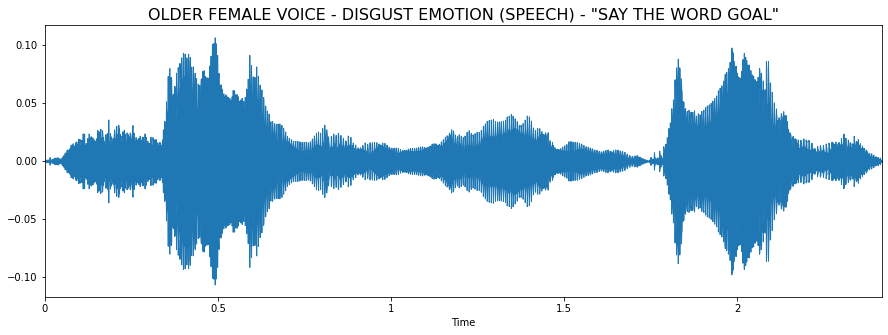

In [ ]:
n_files = TESS_df.shape[0]

# choose random number
rnd = np.random.randint(0,n_files)

# use the Librosa library to load and plot the random speech
fname = TESS_df.path[rnd]

phrase1 = fname.split('/')
phrase2 = phrase1[9].split('_')
the_word = (phrase2[1])
the_age = (phrase2[0])
if the_age == 'YAF':
  age = 'Younger'
elif the_age == 'OAF':
  age = 'Older'
else:
  age = 'Unknown'


data, sampling_rate = librosa.load(fname, sr=44100)

plt.figure(figsize=(15, 5))
info = TESS_df.iloc[rnd].values
title_txt = f'{age} female voice - {info[0][:-7]} emotion (speech) - "Say the word {the_word}"'
plt.title(title_txt.upper(), size=16)
librosa.display.waveplot(data, sr=sampling_rate)

# play the audio 
ipd.Audio(fname)

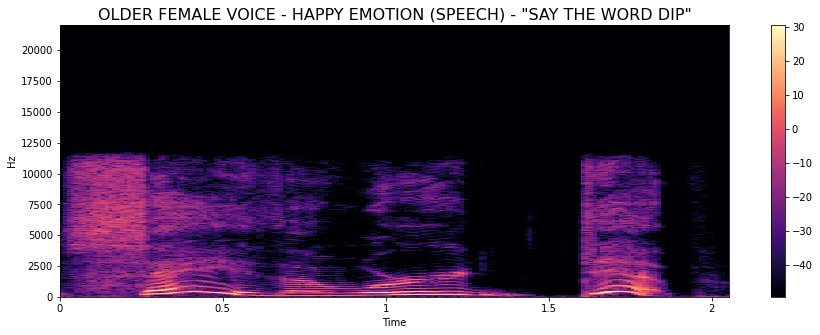

In [ ]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title(title_txt.upper(), size=16)
plt.show()

In [ ]:
data.shape, Xdb.shape

((70954,), (1025, 139))

In [ ]:
def get_audio_data(path, calculate_db=False, calculate_mfccs=False, 
                   add_noize=False, add_speed=False, add_shift=False,
                   plots=False):
  """
  Get all data from the audio file
  """
  data, sampling_rate = librosa.load(path, sr=44100)
  Xdb = None

  # add white noise
  if add_noize: 
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])

  # increase speed
  if add_speed: 
    data = data * np.random.uniform(low=1.5,high=4)

  # add shift
  if add_shift:
    start_ = int(np.random.uniform(-4800,4800))
    if start_ >= 0:
      data = np.r_[data[start_:], np.random.uniform(-0.001,0.001, start_)]
    else:
      data = np.r_[np.random.uniform(-0.001,0.001, -start_), data[:start_]]

  if calculate_db:
      X = librosa.stft(data)
      Xdb = librosa.amplitude_to_db(abs(X))
  mfccs = None

  if calculate_mfccs:
      mfccs = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc = 40)
  
  if calculate_db and plots:
      fig, ax = plt.subplots(1,2,figsize=(16, 3))
      plt.subplot(121)
      librosa.display.waveplot(data, sr=sampling_rate)
      plt.subplot(122)
      librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
      plt.show()
  elif plots:
      librosa.display.waveplot(data, sr=sampling_rate)

  return (data, Xdb, mfccs)

In [ ]:
class DatasetSelector:
  def __init__(self, df, label='emotion2', src='source', path='path', 
               subclass='actors'):
    """
    Format: df.columns = [label, source, actors, path]
    """
    self.df = df
    self.label = label
    self.path = path
    self.subclass = subclass
    self.src = src

  def select(self, source=None, subclass=None, balanced=True, verbose=False):
    """
    The function selects files from the dataset by parameters and returns df
    source: list of sources
    subclass: name of column for subclass
    balanced: True/False - do we need to balance classes or not
    """
    df = self.df

    if not source is None:
      df = df.loc[(df[self.src].isin(source))]

    if not subclass is None:
      df = df.loc[(df[self.subclass]==subclass)]

    if balanced:
      label_counts = df[self.label].value_counts().values
      label_names = df[self.label].value_counts().index
      balanced = np.min(label_counts)

      sub_df_list =[]
      for lab in df[self.label].unique():
        sub_df = df.loc[(df[self.label]==lab)]
        sub_df_list.append(sub_df.sample(balanced))

      df = pd.concat(sub_df_list)

    print(f"New shape: {df.shape}") 
    if balanced and verbose:
      print(df[self.label].value_counts())  

    return df
  
  def load_mfccs(self, source=None, subclass=None, balanced=True):
    """
    The function returns array of mfccs and labels for selected df
    """
    df = self.select(source, subclass, balanced, verbose=True)
    arr_mfccs = []
    
    for path in tqdm(df[self.path].values):
        a1, a2, a3 = get_audio_data(path, calculate_mfccs=True)
        arr_mfccs.append(a3)

    return (arr_mfccs, df[self.label].values)

In [ ]:
ds = DatasetSelector(TESS_df)
balanced_df = ds.select(subclass='female', source=['TESS'])
balanced_df.head()

New shape: (1200, 7)


,emotion_label,source,actors,path,emotion2,emotion3,id
1643,disgust_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female,negative_female,1643
1434,angry_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female,negative_female,1434
1683,disgust_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female,negative_female,1683
2686,sad_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female,sad_female,2686
850,disgust_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female,negative_female,850



Features extracting


-    Signal speed scaling by a random number in [1.5, 4.0] (done).
-    Pitch shift by a random number (to do).
-    Volume increase/decrease by a random number (to do).
-    Addition of random uniform noise (done).
-    Time shift (done).




Preprocessing

In [ ]:
def pad_array(a, limit):
  assert len(a.shape) == 2
  new_a = a

  if a.shape[1] < limit:
    a_shape = a.shape[1]
    new_a = np.zeros((a.shape[0], limit))
    new_a[:, :a.shape[1]] = a

  elif a.shape[1] > limit:
    new_a = a[:,:limit]

  return new_a

def cut_array(a, limit):
  assert len(a.shape) == 2
  if a.shape[1] > limit:
    a = a[:,:limit]
  return a

def transform_mfccs(arr, transform='pad'):
  list_lengths = [x.shape[1] for x in arr]

  if transform == 'pad':
    limit = int(np.median(list_lengths)) # average length of array
    new_arr = [pad_array(a, limit) for a in arr]
  elif transform == 'cut':
    limit = np.min(list_lengths) # mimimal length of array
    new_arr = [cut_array(a, limit) for a in arr]
  else:
    print("wrong parameter for the transformation")
    return

  new_arr = np.array(new_arr)
  return new_arr

Reporting

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def report_res_and_plot_matrix(y_test, y_pred, plot_classes):

  #report metrics
  acc = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {acc:.4f}")
  # print(f"Classes: {plot_classes}")

  #plot matrix
  cnf_matrix = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots()
    
  tick_marks = np.arange(len(plot_classes))
  plt.xticks(ticks=tick_marks, labels=plot_classes, rotation=90)
  plt.yticks(ticks=tick_marks, labels=plot_classes, rotation=90)

  group_counts = [f'{value:0.0f}' for value in cnf_matrix.flatten()]
  group_percentages = [f'{100 * value:0.1f} %' for value in 
                       cnf_matrix.flatten()/np.sum(cnf_matrix)]
  labels = [f'{v1}\n({v2})' for v1, v2 in
            zip(group_counts,group_percentages)]
  n = int(np.sqrt(len(labels)))
  labels = np.asarray(labels).reshape(n,n)
  sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

  ax.xaxis.set_label_position("bottom")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()

  # return metrics
  return [acc, cnf_matrix]

# Classes
Features extracting

In [ ]:
class DatasetSelector:
  def __init__(self, df, label='emotion2', src='source', path='path', 
               subclass='actors'):
    """
    Format: df.columns = [label, source, actors, path]
    """
    self.df = df
    self.label = label
    self.path = path
    self.subclass = subclass
    self.src = src

  def select(self, source=None, subclass=None, balanced=True, verbose=False):
    """
    The function selects files from the dataset by parameters and returns df
    source: list of sources ["TESS", "SAVEE", "RAV", "CREMA"], by default - all
    subclass: name of subclass, by default - all
    balanced: True/False - if needed to balance classes or not
    """
    df = self.df

    if not source is None:
      df = df.loc[(df[self.src].isin(source))]

    if not subclass is None:
      df = df.loc[(df[self.subclass]==subclass)]

    if balanced:
      label_counts = df[self.label].value_counts().values
      label_names = df[self.label].value_counts().index
      balanced = np.min(label_counts)

      sub_df_list =[]
      for lab in df[self.label].unique():
        sub_df = df.loc[(df[self.label]==lab)]
        sub_df_list.append(sub_df.sample(balanced))

      df = pd.concat(sub_df_list)

    print(f"New shape: {df.shape}") 
    if balanced and verbose:
      print(df[self.label].value_counts())  

    return df
  
  def load_mfccs(self, source=None, subclass=None, balanced=True, 
                 with_noise=False, with_shift=False, with_speed=False):
    """
    The function returns array of mfccs and labels for selected df
    """
    df = self.select(source, subclass, balanced, verbose=True)
    arr_mfccs = []
    
    print("Extracting of mfccs from the data...")
    for path in tqdm(df[self.path].values):
      a1, a2, a3 = get_audio_data(path, calculate_mfccs=True, 
                                  add_noize=with_noise, 
                                  add_speed=with_speed, 
                                  add_shift=with_shift)
      arr_mfccs.append(a3)

    return (arr_mfccs, df[self.label].values, df[self.path].values)

  def load_melspecs(self, source=None, subclass=None, balanced=True, 
                    with_noise=False, with_shift=False, with_speed=False):
    """
    The function returns array of mfccs and labels for selected df
    """
    df = self.select(source, subclass, balanced, verbose=True)
    arr_melspec = []
    
    print("Extracting of mel-spectrograms from the data...")
    for path in tqdm(df[self.path].values):
      a1, a2, a3 = get_audio_data(path, calculate_db=True, 
                                  add_noize=with_noise, 
                                  add_speed=with_speed, 
                                  add_shift=with_shift)
      arr_melspec.append(a2)

    print("Converting of mel-spectrograms to images...")
    arr_melspec_images = []
    for a in tqdm(arr_melspec):
      img = np.stack((a,) * 3,-1)
      img = img.astype(np.uint8)
      grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      grayImage = cv2.resize(grayImage, (224, 224))
      arr_melspec_images.append(grayImage)
    
    arr_melspec_images = np.array(arr_melspec_images)

    print("All mel-spectrograms were converted successfully")
    print(arr_melspec_images[:][:][0].shape)
    # plt.imshow(grayImage)

    return (arr_melspec_images, df[self.label].values, df[self.path].values)

Load files

In [ ]:
balanced_df.head()

,emotion_label,source,actors,path,emotion2,emotion3,id
1643,disgust_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female,negative_female,1643
1434,angry_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female,negative_female,1434
1683,disgust_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female,negative_female,1683
2686,sad_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female,sad_female,2686
850,disgust_female,TESS,female,/content/drive/MyDrive/Colab Notebooks/Dataset...,negative_female,negative_female,850


In [ ]:
ds = DatasetSelector(balanced_df)

Data preparation

In [ ]:
X, y, check_ = ds.load_mfccs(subclass='female', source=['TESS'], balanced=False)

New shape: (1200, 7)
Extracting of mfccs from the data...


  0%|          | 0/1200 [00:00<?, ?it/s]

In [ ]:
X = transform_mfccs(X)

## Train and test splitting

In [ ]:
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((960, 40, 176), (240, 40, 176), (960,), (240,))

In [ ]:
# vectorize labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
le.classes_

array(['negative_female', 'neutral_female', 'positive_female'],
      dtype=object)

## Model

In [ ]:
# build base model1 for mfccs
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv1D(64, 10, padding='same', input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.MaxPooling1D(pool_size=(4)))

model.add(tf.keras.layers.Conv1D(64, 10,padding='same',))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.MaxPooling1D(pool_size=(4)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(3))
model.add(tf.keras.layers.Activation('softmax'))

# set callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                                 factor=0.5, patience=4, 
                                                 verbose=1, mode='max', 
                                                 min_lr=0.00001)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=42,
                                              verbose=1)

# model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(main_path,'female_model_weights.hdf5'), 
#                                                       save_weights_only=True, 
#                                                       monitor='val_accuracy', 
#                                                       mode='max', 
#                                                       save_best_only=True)

model.compile(optimizer=Adam(lr=0.0006), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 40, 64)            112704    
                                                                 
 activation_3 (Activation)   (None, 40, 64)            0         
                                                                 
 dropout_4 (Dropout)         (None, 40, 64)            0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 10, 64)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 10, 64)            41024     
                                                                 
 activation_4 (Activation)   (None, 10, 64)            0         
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
a, len_a = y_train, len(y_train)
a0 = len(np.where(a == 0)[0])/len_a 
a1 = len(np.where(a == 1)[0])/len_a
a2 = len(np.where(a == 2)[0])/len_a

class_weight = {0: a0, 1: a1, 2: a2}

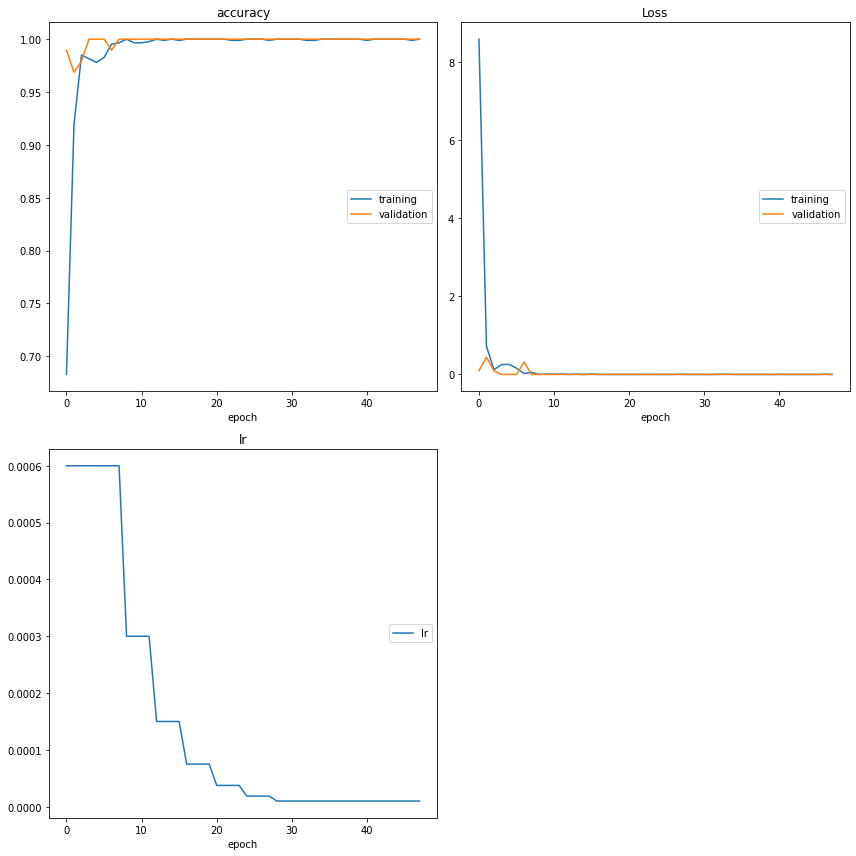

accuracy
	training         	 (min:    0.683, max:    1.000, cur:    1.000)
	validation       	 (min:    0.969, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.000, max:    8.587, cur:    0.000)
	validation       	 (min:    0.000, max:    0.443, cur:    0.000)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
54/54 [==============================] - 2s 29ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 48: early stopping


In [ ]:
history = model.fit(X_train, y_train, batch_size=16, epochs=100, validation_split=0.1, 
                    callbacks=[early_stop, reduce_lr, PlotLossesKeras()],
                    class_weight=class_weight)

                 precision    recall  f1-score   support

negative_female       1.00      1.00      1.00        80
 neutral_female       1.00      1.00      1.00        80
positive_female       1.00      1.00      1.00        80

       accuracy                           1.00       240
      macro avg       1.00      1.00      1.00       240
   weighted avg       1.00      1.00      1.00       240

Accuracy: 1.0000


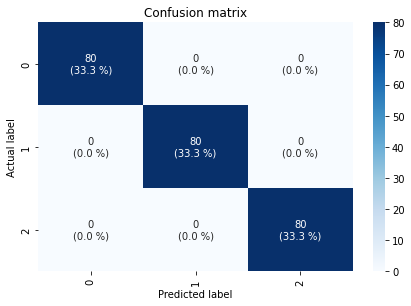

In [ ]:
y_pred = model.predict(X_test).argmax(axis=1)

print(classification_report(y_test, y_pred, target_names=le.classes_))
params = report_res_and_plot_matrix(y_test, y_pred, le.classes_)

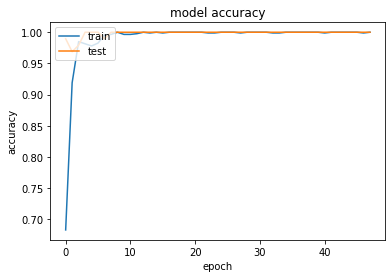

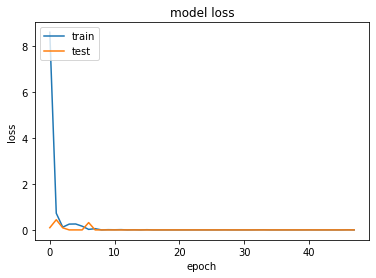

In [ ]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

